## ***Visión por Computadora - 2024***
### *Lab 01 - Ejercicio 4*

Stefano Aragoni, Carol Arévalo, José González, Luis Santos

-----------



#### *Importar librerías*

Como primer paso, se importa numpy, cv2, y matplotlib.

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import util, morphology

Buscar una imagen en grises I, con ruido (el ruido se puede generar de forma sintetica y añadirlo a la imagen). Aplicar una filtrado secuencial, esto es, una secuencia de openings y closings sobre la imagen I (ver seccion 9.6.3), con diferentes elementos estructurantes.

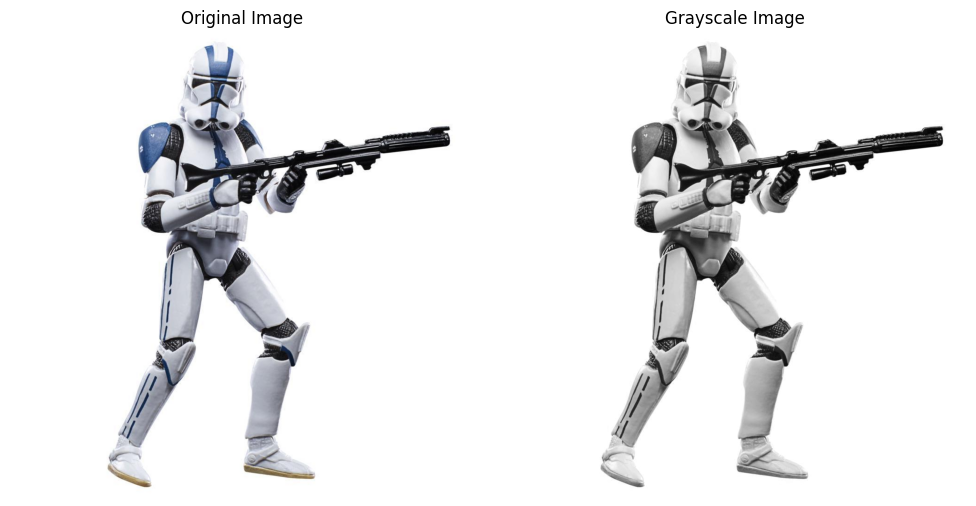

In [8]:
from skimage import io, color
import matplotlib.pyplot as plt

# Cargar la imagen
image_clone_trooper = io.imread('./img/clone-tropper.jpg')
# Convertir la imagen a escala de grises
image_clone_trooper_gray = color.rgb2gray(image_clone_trooper)

# Guardar la imagen en escala de grises
path_clone_trooper_gray = './img/clone-tropper_gray.jpg'
io.imsave(path_clone_trooper_gray, (image_clone_trooper_gray * 255).astype('uint8'))

# Mostrar la imagen original y la imagen en escala de grises
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image_clone_trooper)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(image_clone_trooper_gray, cmap='gray')
ax[1].set_title('Grayscale Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()


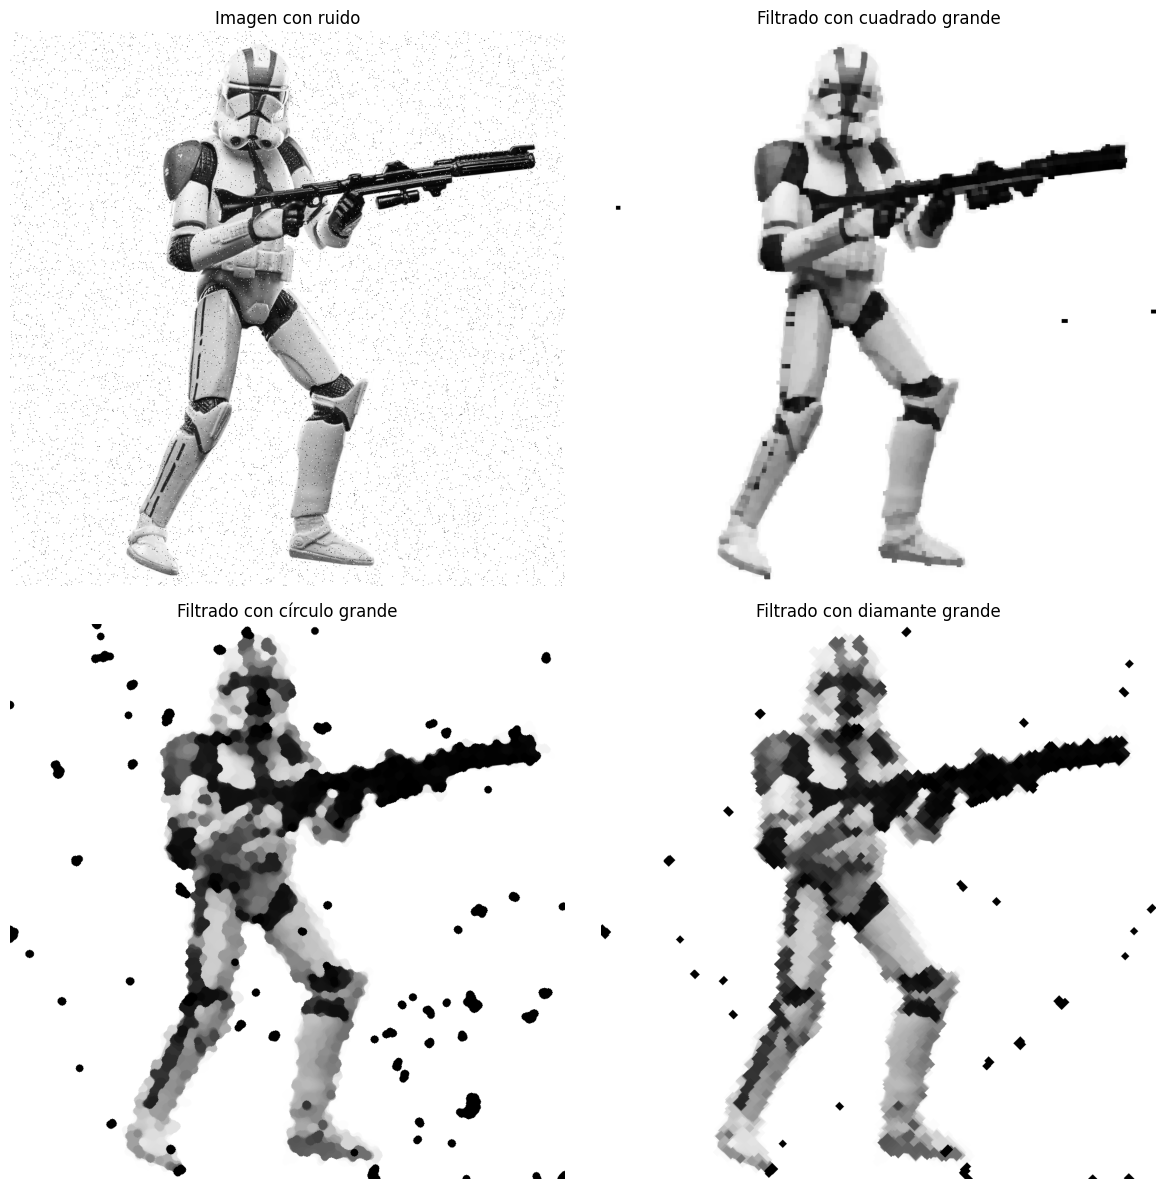

In [9]:
# Since the code environment was reset, we need to reload the grayscale image.
image_clone_trooper_gray = io.imread('./img/clone-tropper_gray.jpg')

# Add synthetic noise to the image
noisy_image = util.random_noise(image_clone_trooper_gray, mode='s&p', amount=0.02)
# Definir elementos estructurantes de mayor tamaño para un efecto más notable
selem_square_large = morphology.square(7)
selem_circle_large = morphology.disk(7)
selem_diamond_large = morphology.diamond(7)

# Realizar filtrado secuencial con los elementos estructurantes más grandes
filtered_square_large = morphology.closing(morphology.opening(noisy_image, selem_square_large), selem_square_large)
filtered_circle_large = morphology.closing(morphology.opening(noisy_image, selem_circle_large), selem_circle_large)
filtered_diamond_large = morphology.closing(morphology.opening(noisy_image, selem_diamond_large), selem_diamond_large)

# Mostrar las imágenes resultantes con elementos estructurantes más grandes
fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(noisy_image, cmap='gray')
ax[0].set_title('Imagen con ruido')

ax[1].imshow(filtered_square_large, cmap='gray')
ax[1].set_title('Filtrado con cuadrado grande')

ax[2].imshow(filtered_circle_large, cmap='gray')
ax[2].set_title('Filtrado con círculo grande')

ax[3].imshow(filtered_diamond_large, cmap='gray')
ax[3].set_title('Filtrado con diamante grande')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


Comparar los resultados obtenidos e indicar cual es el efecto resultante.


Claro, aquí tienes una comparación resumida en español:

- **Imagen con ruido**: Exhibe ruido tipo sal y pimienta, con píxeles aleatorios blancos y negros.
- **Filtrado con cuadrado grande**:
  - Reduce el ruido de manera efectiva.
  - Preserva mejor las formas cuadradas y bordes rectos.
  - Puede perder detalles finos por el tamaño del elemento.
- **Filtrado con círculo grande**:
  - Reduce el ruido manteniendo curvas y formas redondeadas.
  - Los detalles pequeños pueden desaparecer igual que con el cuadrado.
- **Filtrado con diamante grande**:
  - Balance entre preservar líneas rectas y curvas.
  - Reduce ruido y mantiene algo de detalles diagonales.

**Efecto general**:
- Todos los filtros reducen el ruido pero suavizan o eliminan detalles finos.
- La forma del elemento estructurante afecta qué detalles se preservan.
- Elementos más grandes limpian más ruido pero a costa de perder detalles.